In [1]:
!git clone https://github.com/bordia98/Minor-Project.git

Cloning into 'Minor-Project'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (677/677), done.
remote: Compressing objects: 100% (451/451), done.
remote: Total 677 (delta 216), reused 659 (delta 210), pack-reused 0
Receiving objects: 100% (677/677), 385.97 MiB | 27.99 MiB/s, done.
Resolving deltas: 100% (216/216), done.
Checking out files: 100% (630/630), done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cp -r "/content/gdrive/My Drive/models/research/test_images_sim" "/content/Minor-Project/models/research/"

In [0]:
%cd /content/Minor-Project/models/research

In [0]:
!ls
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim;
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

In [0]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

faster_rcnn_sim_model = 'frozen_models/frozen_sim/frozen_inference_graph.pb'
PATH_TO_LABELS = 'label_map.pbtxt'

NUM_CLASSES = 14

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)



In [15]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

from glob import glob

detection_graph = tf.Graph()

with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(faster_rcnn_sim_model, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
PATH_TO_TEST_IMAGES_DIR = 'test_images_sim'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

test_images_sim/*.jpg
Length of test images: 12


test_images_sim/left0003.jpg


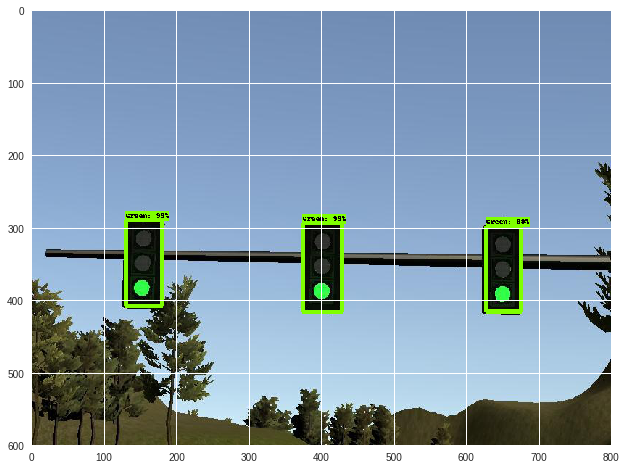

Green 0.9974247
Distance (metres) 0.0
Time in milliseconds 9962.054014205933 

Green 0.9967643
Distance (metres) 0.0
Time in milliseconds 9962.054014205933 

Green 0.99476886
Distance (metres) 0.0
Time in milliseconds 9962.054014205933 

test_images_sim/left0034.jpg


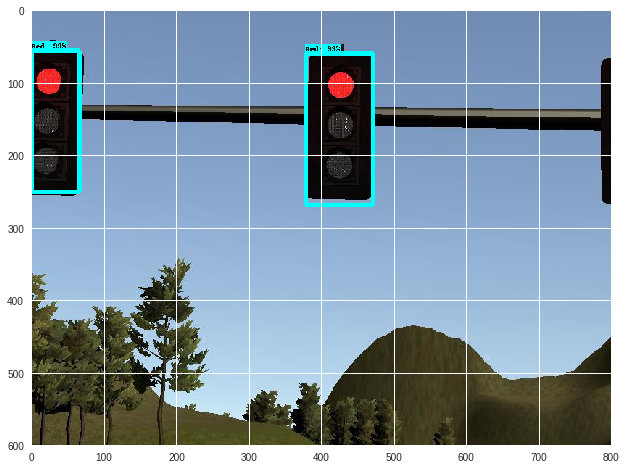

Red 0.9992343
Distance (metres) 0.0
Time in milliseconds 220.48425674438477 

Red 0.99679875
Distance (metres) 0.0
Time in milliseconds 220.48425674438477 

test_images_sim/left0040.jpg


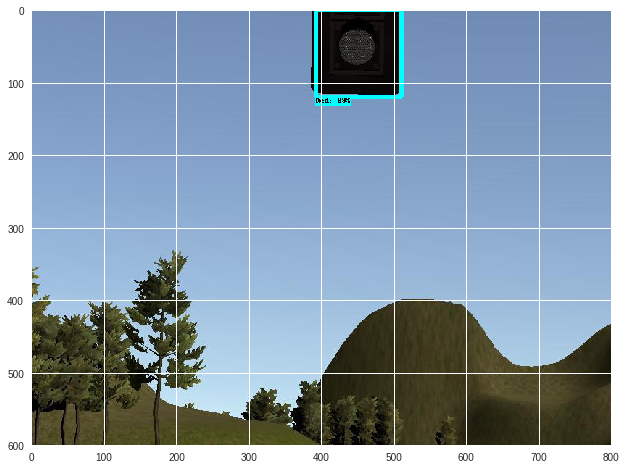

Red 0.9906035
Distance (metres) 0.0
Time in milliseconds 189.62526321411133 

test_images_sim/left0560.jpg


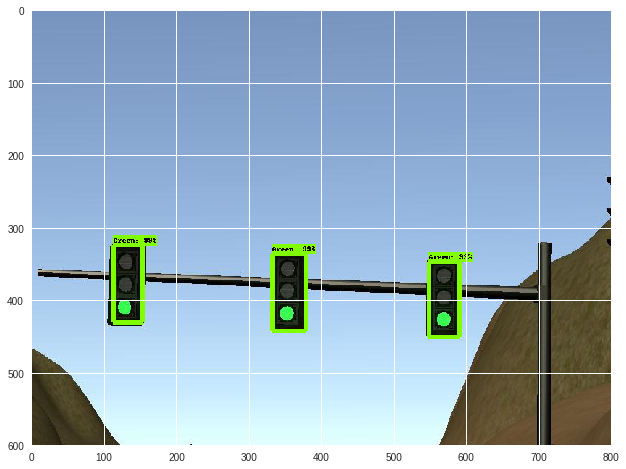

Green 0.9987436
Distance (metres) 0.0
Time in milliseconds 181.27202987670898 

Green 0.99799925
Distance (metres) 0.0
Time in milliseconds 181.27202987670898 

Green 0.9963414
Distance (metres) 0.0
Time in milliseconds 181.27202987670898 

test_images_sim/left0588.jpg


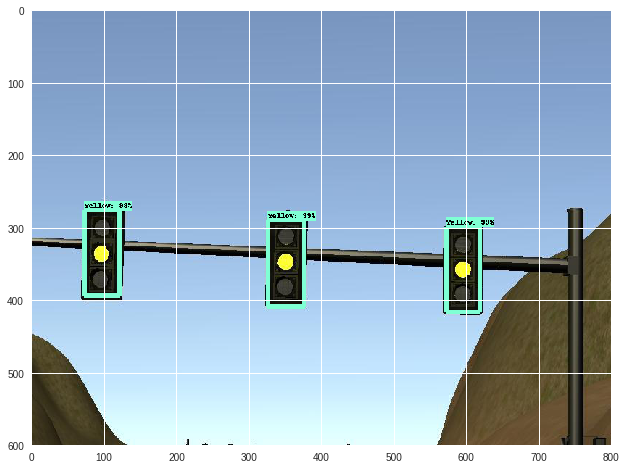

Yellow 0.9976495
Distance (metres) 0.0
Time in milliseconds 184.42988395690918 

Yellow 0.9974132
Distance (metres) 0.0
Time in milliseconds 184.42988395690918 

Yellow 0.9929386
Distance (metres) 0.0
Time in milliseconds 184.42988395690918 

test_images_sim/left0607.jpg


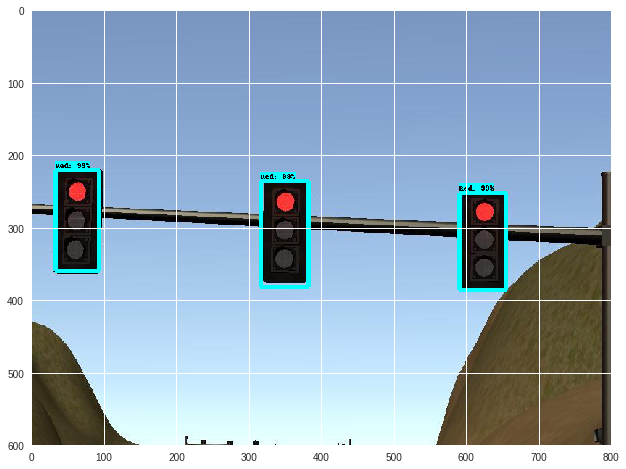

Red 0.9996132
Distance (metres) 0.0
Time in milliseconds 184.2961311340332 

Red 0.9995962
Distance (metres) 0.0
Time in milliseconds 184.2961311340332 

Red 0.99949336
Distance (metres) 0.0
Time in milliseconds 184.2961311340332 

test_images_sim/left0011.jpg


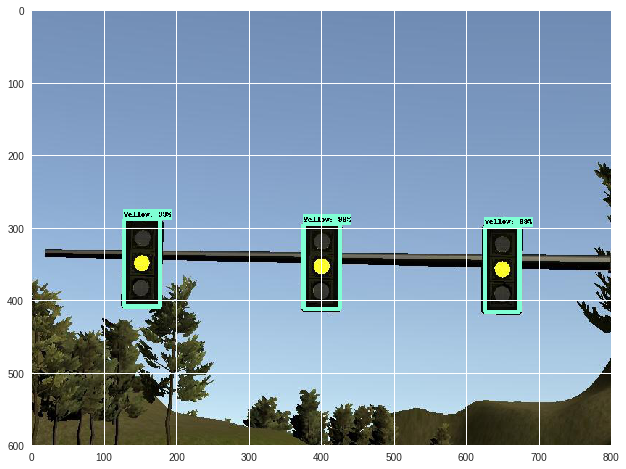

Yellow 0.9965551
Distance (metres) 0.0
Time in milliseconds 218.2784080505371 

Yellow 0.9964616
Distance (metres) 0.0
Time in milliseconds 218.2784080505371 

Yellow 0.99439704
Distance (metres) 0.0
Time in milliseconds 218.2784080505371 

test_images_sim/left0545.jpg


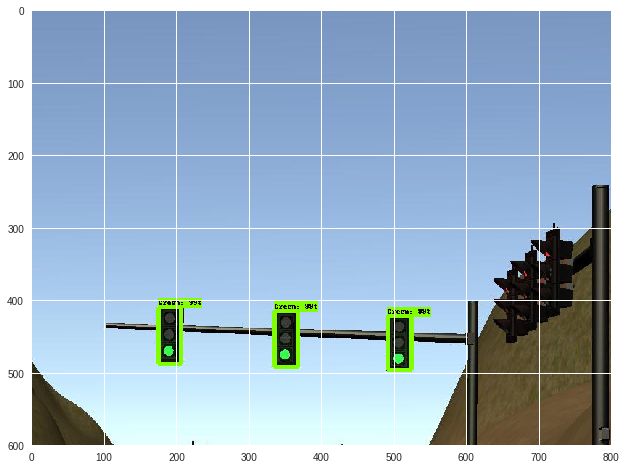

Green 0.99805754
Distance (metres) 0.0
Time in milliseconds 222.37300872802734 

Green 0.99633247
Distance (metres) 0.0
Time in milliseconds 222.37300872802734 

Green 0.9929028
Distance (metres) 0.0
Time in milliseconds 222.37300872802734 

test_images_sim/left0027.jpg


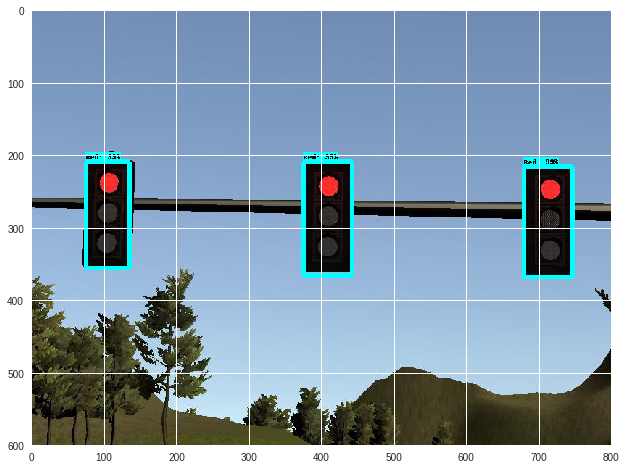

Red 0.99947804
Distance (metres) 0.0
Time in milliseconds 225.89874267578125 

Red 0.99940825
Distance (metres) 0.0
Time in milliseconds 225.89874267578125 

Red 0.99714833
Distance (metres) 0.0
Time in milliseconds 225.89874267578125 

test_images_sim/left0606.jpg


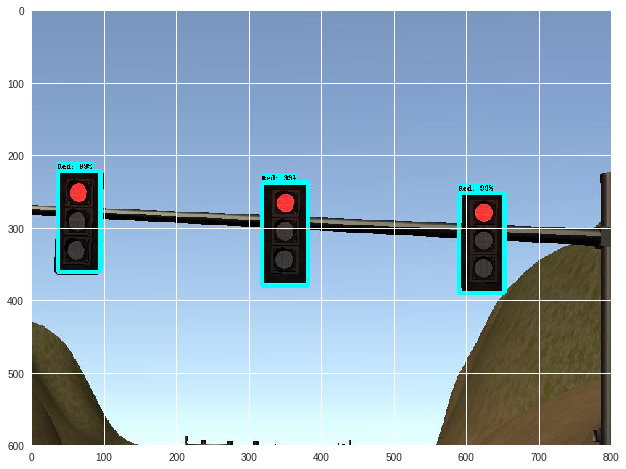

Red 0.9996282
Distance (metres) 0.0
Time in milliseconds 201.12919807434082 

Red 0.99950564
Distance (metres) 0.0
Time in milliseconds 201.12919807434082 

Red 0.99895406
Distance (metres) 0.0
Time in milliseconds 201.12919807434082 

test_images_sim/left0048.jpg


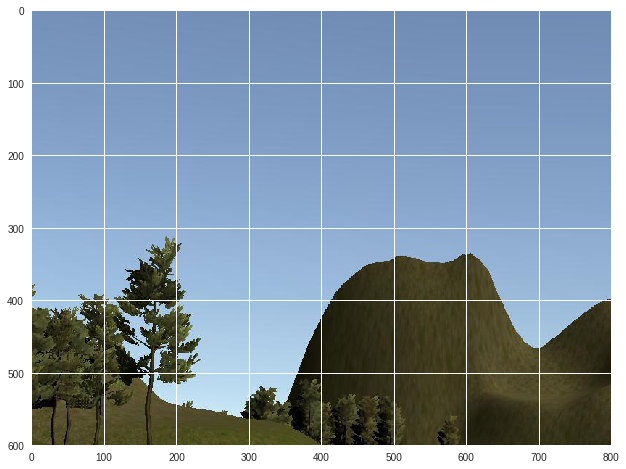

test_images_sim/left0036.jpg


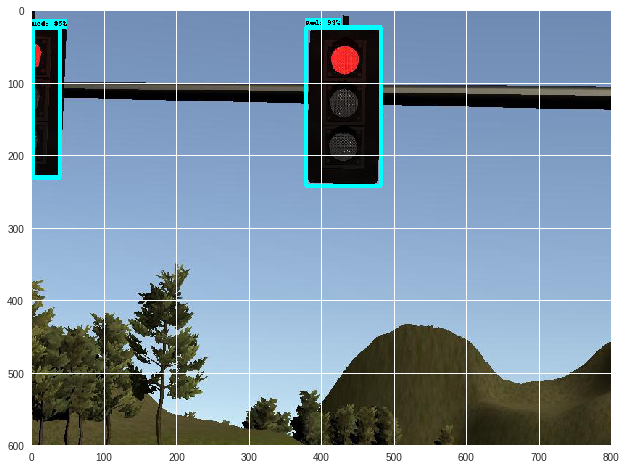

Red 0.99910766
Distance (metres) 0.0
Time in milliseconds 194.34547424316406 

Red 0.95788044
Distance (metres) 0.0
Time in milliseconds 194.34547424316406 



In [16]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            print(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .50
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.97428
                    fy =  1.73205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )

                    estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                    print("Distance (metres)", estimated_distance)
                    print("Time in milliseconds", (time1 - time0) * 1000, "\n")